В качестве набора данных я выбрала датасет, демонстрирующий качество вина по содержанию в нем разных веществ (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/version/2).

Эта задача будет полезна в различных ресторанах, алкогольных магазинах, а также на различных винодельнях.

Датасет состоит пока что из одного файла, но для обучения модели я разобью его на 3 части.

В моем датасете хранятся следующие данные:

1)fixed acidit - фиксированная кислотность

2)volatile acidity - летучая кислотность

3)citric acid - лимонная кислота

4)residual sugar - остаточный сахар

5)chlorides - хлориды

6)free sulfur dioxide - свободный диоксид серы

7)total sulfur dioxide - общий диоксид серы

8)density - плотность

9)pH - водородный показатель

10)sulphates - сульфаты

11)alcohol - алкоголь

12)quality - качество - целевой признак - оценка вина от 0 до 10 баллов (на деле от 3 до 8)

Более подробное описание этого датасета по ссылке.



In [0]:
#Импорт библиотек 
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks") 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, prec ision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

In [0]:
#Монтирую гугл диск, чтобы взять оттуда датасет
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:
#Загружаю данные с гугл диска
data = pd.read_csv('/content/gdrive/My Drive/winequality-red.csv', sep=",")

In [0]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [0]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))
#data.columns
#data.dtypes
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Всего строк: 1599
fixed acidity - 0
volatile acidity - 0
citric acid - 0
residual sugar - 0
chlorides - 0
free sulfur dioxide - 0
total sulfur dioxide - 0
density - 0
pH - 0
sulphates - 0
alcohol - 0
quality - 0


In [0]:
#Типы данных значений датасета
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Так как нет нулевых значений,  и нет никаких категориальных признаков - ничего заменять не надо. Но признаков очень много, некоторые можно убрать.

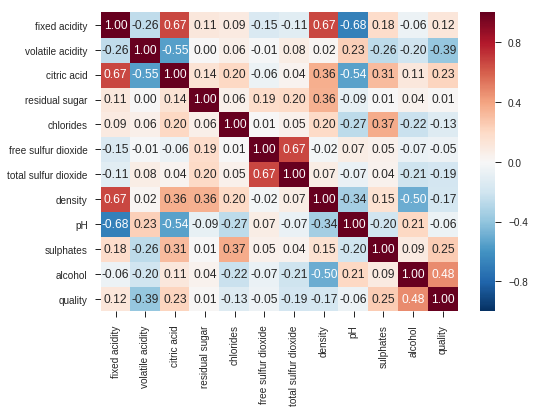

In [0]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')

Исходя из этого можно сказать, что некоторые признаки будут только мешать и их стоит убрать. 

In [0]:
cols_x = ['fixed acidity', 'citric acid', 'sulphates', 'alcohol']   
# целевой признак
col_y = 'quality'
#разделение данных
X_train, X_test, y_train, y_test = train_test_split(data[cols_x], data[col_y], test_size = 0.5, random_state = 11)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

799 800


#Классификатор
Я решила использовать классификатор, так как у меня получается только есть только 6 оценок. Есть предположение, что регрессор будет прездсказывать значения, невходящие в эти 6 оценок. 

In [0]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
KNeighborsClassifierObj.fit(X_train, y_train)
KNeighborsClassifierObj.predict(X_test)[0:20]

array([6, 6, 4, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 7, 7, 6])

In [0]:
y_test.head(20)

1429    5
260     5
916     5
1141    6
1574    6
82      5
1038    7
641     5
56      5
1073    6
433     5
1575    6
136     5
899     3
1025    6
604     6
775     5
1150    7
1239    4
293     6
Name: quality, dtype: int64

**Попробую сделать то же, но с 5 соседями**




In [0]:
KNeighborsClassifierObj5 = KNeighborsClassifier(n_neighbors=5)
KNeighborsClassifierObj5

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
KNeighborsClassifierObj5.fit(X_train, y_train)
KNeighborsClassifierObj5.predict(X_test)[0:20]

array([6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 5])

#Проверка точности разными метриками

In [0]:
#5 ближайших соседей
accuracy_score(y_test, KNeighborsClassifierObj5.predict(X_test))

0.54375

In [0]:
#3 ближайших соседа 
accuracy_score(y_test, KNeighborsClassifierObj.predict(X_test))

0.5175

In [0]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [0]:
# Если целевой признак ==7, 
# то будем считать этот случай 1 в бинарном признаке
bin_y_test = convert_target_to_binary(y_test, 7)
list(zip(y_test, bin_y_test))[0:15]

[(5, 0),
 (5, 0),
 (5, 0),
 (6, 0),
 (6, 0),
 (5, 0),
 (7, 1),
 (5, 0),
 (5, 0),
 (6, 0),
 (5, 0),
 (6, 0),
 (5, 0),
 (3, 0),
 (6, 0)]

In [0]:
# Конвертация предсказанных признаков
bin_target3 = convert_target_to_binary(KNeighborsClassifierObj.predict(X_test), 7)
bin_target5 = convert_target_to_binary(KNeighborsClassifierObj5.predict(X_test), 7)

In [0]:
#3 ближайших соседа
balanced_accuracy_score(bin_y_test, bin_target3)

0.5957142857142856

In [0]:
#5 ближайших соседей
balanced_accuracy_score(bin_y_test, bin_target5)

0.6278571428571429

In [0]:
#3 соседа
precision_score(bin_y_test, bin_target3), recall_score(bin_y_test, bin_target3)

(0.32926829268292684, 0.27)

In [0]:
#5 соседей
precision_score(bin_y_test, bin_target5), recall_score(bin_y_test, bin_target5)

(0.4155844155844156, 0.32)

#Кросс-валидация

In [0]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         data[cols_x], data[col_y], cv=3)

In [0]:
scores

array([0.4953271 , 0.51407129, 0.5047081 ])

In [0]:
np.mean(scores)


0.5047021650970915

In [0]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [0]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=8), 
                        data[cols_x], data[col_y], scoring=scoring, 
                        cv=3, return_train_score=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py

In [0]:
scores

{'fit_time': array([0.0026083 , 0.00242686, 0.00215244]),
 'score_time': array([0.01546717, 0.01255178, 0.01525617]),
 'test_f1': array([0.47744419, 0.51588412, 0.52858502]),
 'test_precision': array([0.49122376, 0.50427431, 0.52647768]),
 'test_recall': array([0.51775701, 0.53283302, 0.5480226 ]),
 'train_f1': array([0.63805783, 0.64823261, 0.64068281]),
 'train_precision': array([0.63372329, 0.65771406, 0.62684221]),
 'train_recall': array([0.66259398, 0.67073171, 0.66385768])}

In [0]:
#Kfold
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         data[cols_x], data[col_y], 
                         cv=KFold(n_splits=5))
scores

array([0.5       , 0.528125  , 0.553125  , 0.521875  , 0.52978056])

In [0]:
#ShuffleSplit
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         data[cols_x], data[col_y], 
                         cv=ShuffleSplit(n_splits=5, test_size=0.25))
scores


array([0.5475, 0.595 , 0.5825, 0.5925, 0.57  ])

#Grid Search (решетчатый поиск)

In [0]:
n_range = np.array(range(2,22,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])}]

In [0]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(data[cols_x], data[col_y])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
clf_gs.cv_results_


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([0.00320864, 0.0018784 , 0.00196204, 0.00184245, 0.00204043,
        0.00188065, 0.00202212, 0.00205121, 0.00203662, 0.00200739]),
 'mean_score_time': array([0.00361848, 0.00244255, 0.00246744, 0.00240417, 0.00274987,
        0.0027307 , 0.00291009, 0.00328074, 0.00344324, 0.00323553]),
 'mean_test_score': array([0.48968105, 0.51782364, 0.50906817, 0.53283302, 0.54534084,
        0.53158224, 0.53033146, 0.52595372, 0.51969981, 0.52470294]),
 'mean_train_score': array([0.83254899, 0.72529956, 0.69418839, 0.67104697, 0.649309  ,
        0.63633265, 0.62429062, 0.6147541 , 0.61398714, 0.60912688]),
 'param_n_neighbors': masked_array(data=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2},
  {'n_neighbors': 4},
  {'n_neighbors': 6},
  {'n_neighbors': 8},
  {'n_neighbors': 10},
  {'n_neigh

In [0]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [0]:
# Лучшее значение метрики
clf_gs.best_score_

0.5453408380237649

In [0]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 10}

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


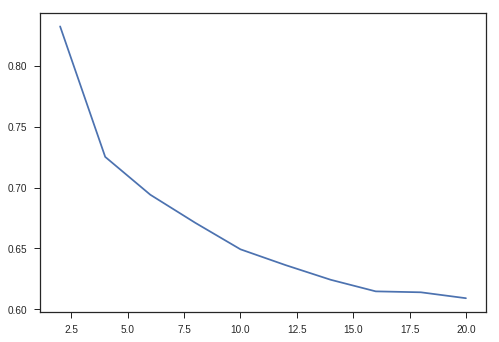

In [0]:
# Изменение качества на обучающей выборке
plt.plot(n_range, clf_gs.cv_results_['mean_train_score'])

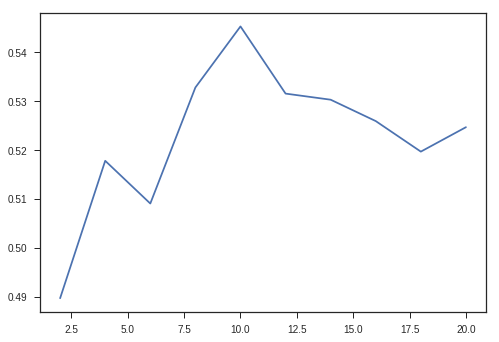

In [0]:
# Изменение качества на тестовой выборке
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [0]:
KNeighborsClassifierObjBest = KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifierObj

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
KNeighborsClassifierObjBest.fit(X_train, y_train)
KNeighborsClassifierObjBest.predict(X_test)[0:20]

array([6, 5, 6, 6, 5, 5, 7, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 7, 6, 5])

In [0]:
accuracy_score(y_test, KNeighborsClassifierObjBest.predict(X_test))

0.53625

In [0]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [0]:
# Конвертация предсказанных признаков
bin_targetBest = convert_target_to_binary(KNeighborsClassifierObjBest.predict(X_test), 7)

In [0]:
balanced_accuracy_score(bin_y_test, bin_targetBest)

0.635

In [0]:
precision_score(bin_y_test, bin_targetBest), recall_score(bin_y_test, bin_targetBest)

(0.40963855421686746, 0.34)

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

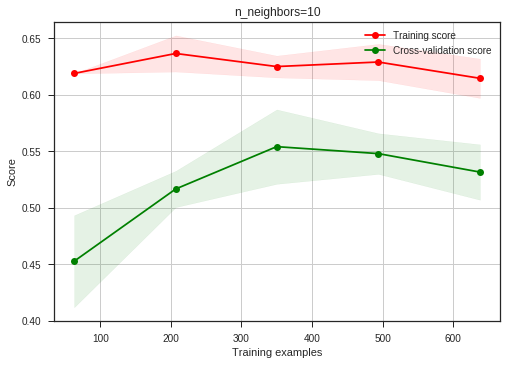

In [0]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), 'n_neighbors=10', 
                    X_train, y_train, cv=StratifiedKFold(n_splits=5))

In [0]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

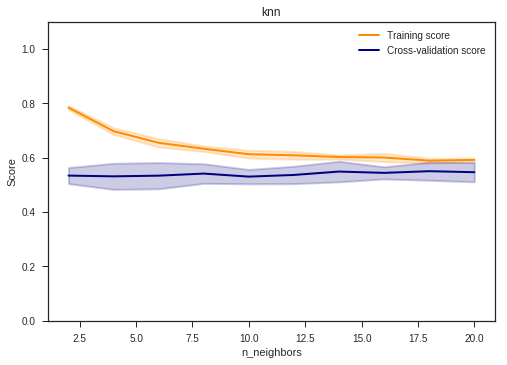

In [0]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=StratifiedKFold(n_splits=5), scoring="accuracy")